In [4]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns

In [5]:
n_drivers = 5
STEPS_PER_PASSENGER = np.linspace(.6, 1.2, 13)
dynamic_waiting_times = []
linear_waiting_times = []

for i in range(len(STEPS_PER_PASSENGER)):

    steps_per_passenger = STEPS_PER_PASSENGER[i]

    with open(f"../data/dynamic_passenger_waiting_times_{n_drivers}drivers_{steps_per_passenger}stepsperpassenger.pkl", "rb") as f:
        dynamic_waiting_times.append(pickle.load(f))

    with open(f"../data/linear_sum_passenger_waiting_times_{n_drivers}drivers_{steps_per_passenger}stepsperpassenger.pkl", "rb") as f:
        linear_waiting_times.append(pickle.load(f))


In [6]:
mean_dynamic_waiting_times = np.array([np.mean(times) for times in dynamic_waiting_times])
mean_linear_waiting_times = np.array([np.mean(times) for times in linear_waiting_times])
differences = mean_linear_waiting_times - mean_dynamic_waiting_times

Text(0.5, 1.0, '$\\mu_{t,linear} - \\mu_{t,dynamic}$ vs Driver per Passenger per Step')

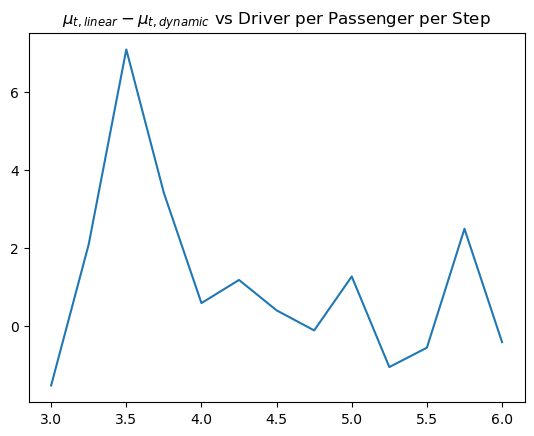

In [10]:
plt.plot(n_drivers * STEPS_PER_PASSENGER, differences)
plt.title("$\mu_{t,linear} - \mu_{t,dynamic}$ vs Driver per Passenger per Step")

In [13]:
differences/mean_linear_waiting_times, n_drivers*STEPS_PER_PASSENGER

(array([-0.04577839,  0.09112026,  0.30906799,  0.14871565,  0.02931999,
         0.06362143,  0.02296514, -0.00624694,  0.07820761, -0.06570845,
        -0.03428671,  0.14351133, -0.02539255]),
 array([3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
        5.75, 6.  ]))

We observe that the dynamic matching process increases efficiency only in a specific range around the ratio 3.5. We think that the reason for this is as follows:
- If there are way too many passengers being generated, the drivers can immediately pick up passengers wherever they are. Hence, there's no need to do dynamic matching, there are passengers everywhere and the drivers are matched with the excess demand wherever they are.
- If there are too few passengers, then whenever one is generated it's matched with the closest driver, which then drops off the passenger until a new one is generated. Hence, there won't be a need to do dynamic matching.

This shows that a certain amount of congestion is required for dynamic matching to make sense. 